# Linear Regression Lab

### Intro and objectives


### In this lab you will learn:
1. an complete example of training and testing linear regression models

## What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


In [2]:


# Load data

melbourne_data = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/ML4DS301/main/data/melb_data.csv')
melbourne_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [3]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
# Filter rows with missing price values
filtered_melbourne_data = melbourne_data.dropna(axis=0)

## 1. First Model: Linear Regression (Simple)

In [5]:
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize']
X = filtered_melbourne_data[melbourne_features]

### We split the dataset in two: train and test

In [6]:
# split data into training and test data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

In [7]:
train_X

,Rooms,Bathroom,Landsize
10385,3,1.0,206.0
5805,2,1.0,0.0
8488,2,1.0,2701.0
6672,3,1.0,670.0
776,6,3.0,708.0
...,...,...,...
9510,3,1.0,118.0
6023,5,2.0,661.0
2960,4,2.0,453.0
4729,2,1.0,90.0


In [8]:
test_X

,Rooms,Bathroom,Landsize
4850,2,1.0,96.0
2307,2,1.0,0.0
10090,2,1.0,136.0
3645,3,2.0,205.0
4930,2,1.0,400.0
...,...,...,...
8223,2,1.0,0.0
11190,3,2.0,590.0
8563,1,1.0,1175.0
1867,2,1.0,585.0


In [9]:
train_y

,Price
10385,1060000.0
5805,390000.0
8488,502000.0
6672,1055000.0
776,1900000.0
...,...
9510,1875000.0
6023,605000.0
2960,709000.0
4729,1000000.0


In [10]:
test_y

,Price
4850,815000.0
2307,655000.0
10090,957500.0
3645,1330000.0
4930,722000.0
...,...
8223,520000.0
11190,870000.0
8563,200000.0
1867,1002000.0


### We define and fit the model using the train dataset

In [11]:
# Define model
melbourne_model = LinearRegression()

In [12]:
# Fit model
melbourne_model.fit(train_X, train_y)

LinearRegression()

### We test the performance of the model using the test dataset

In [13]:
# get predicted prices on validation data
val_predictions = melbourne_model.predict(test_X)
print(mean_absolute_error(test_y, val_predictions))

387984.68598592625


#### Our mean absolute error for the validation dataset is larger than 350K Dollars.

## 2. Second Model: Linear Regression (Expanded)

#### Our previous model was not very accurate. We need to experiment with alternatives. We could add more features and quadratic terms.

### Let's conduct some basic exploratory analysis

In [14]:
filtered_melbourne_data[['Rooms','Bathroom','Landsize','BuildingArea','YearBuilt','Distance','Price']].corr()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Distance,Price
Rooms,1.000000,0.613853,0.098755,0.608215,-0.068122,0.283885,0.533505
Bathroom,0.613853,1.000000,0.076295,0.534425,0.157820,0.124530,0.503922
Landsize,0.098755,0.076295,1.000000,0.084825,0.026518,0.059369,0.081419
BuildingArea,0.608215,0.534425,0.084825,1.000000,0.005836,0.159603,0.530574
YearBuilt,-0.068122,0.157820,0.026518,0.005836,1.000000,0.246291,-0.304633
Distance,0.283885,0.124530,0.059369,0.159603,0.246291,1.000000,-0.148867
Price,0.533505,0.503922,0.081419,0.530574,-0.304633,-0.148867,1.000000


#### Overall we observe moderate levels of correlation between features such as `Rooms`,`Bathroom`  and the outcome `Price`

#### Some features such as `YearBuilt` and `Distance` are negatively correlated with `Price`

#### `Landsize` is not correlated with `Price`

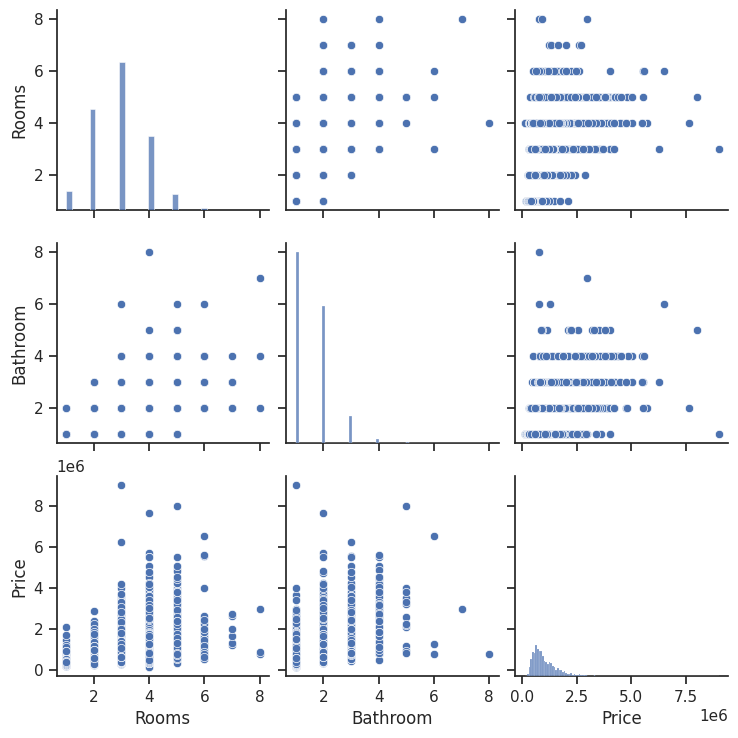

In [15]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(filtered_melbourne_data[['Rooms', 'Bathroom', 'Price']])

#### From the previous figure we observe that the relationship between Price and Rooms is not linear, there is a maximum at around 4-5 rooms decreasing afterwards.

#### Similarly we observe non linear relationship between Price and the number of Bathrooms

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

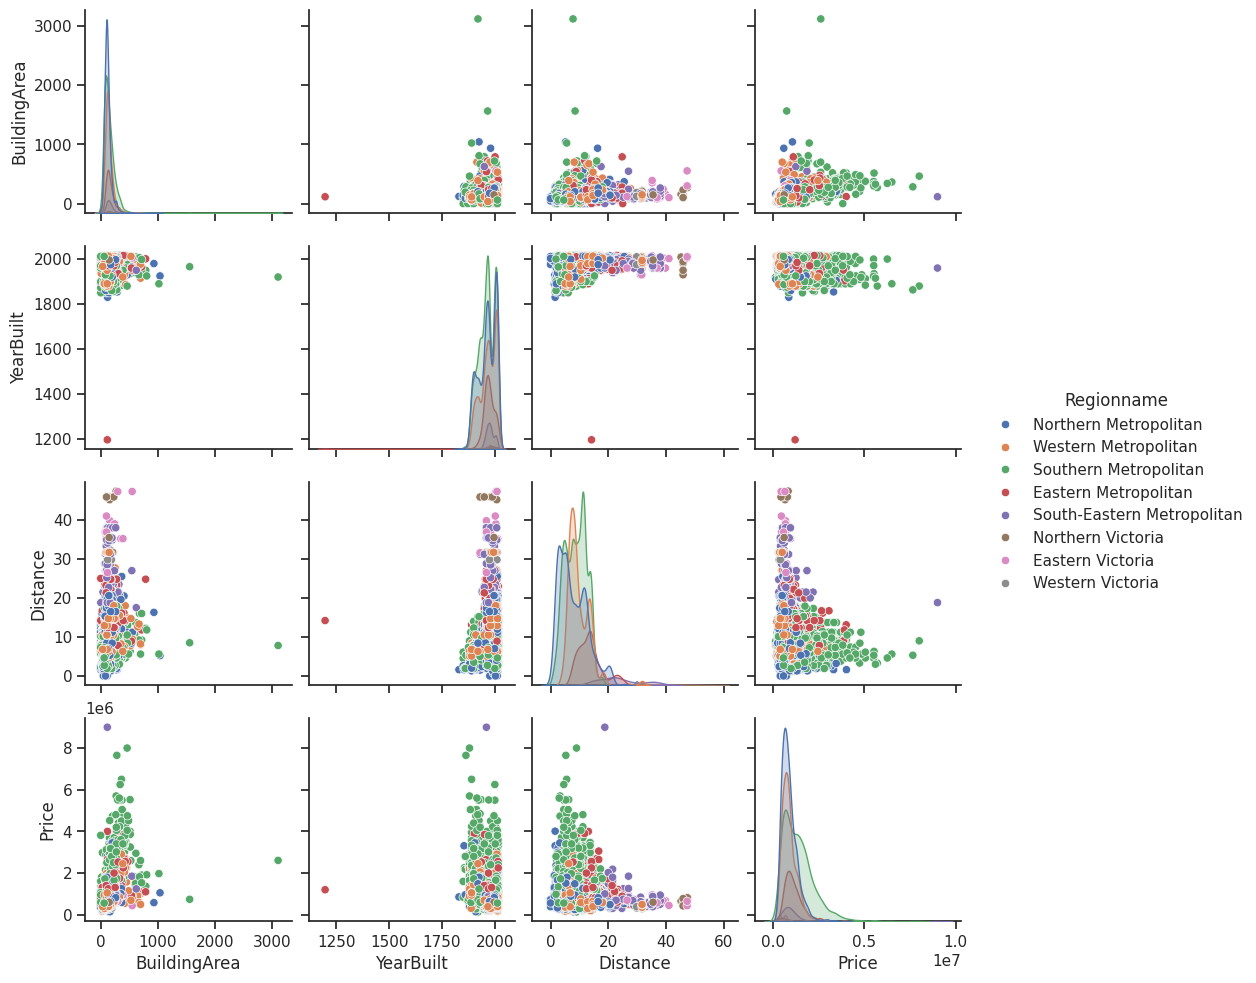

In [16]:
sns.pairplot(filtered_melbourne_data[['BuildingArea', 'YearBuilt','Distance', 'Price','Regionname']],hue='Regionname')

#### We observe that the region SouthernMetropolitan commands higher house prices

#### Based on the previous figure we conclude that the Region plays a significant role in the outcome variable Price

### We need to encode the categorical feature `Regionname`

In [17]:
filtered_melbourne_data['Regionname']

,Regionname
1,Northern Metropolitan
2,Northern Metropolitan
4,Northern Metropolitan
6,Northern Metropolitan
7,Northern Metropolitan
...,...
12205,Northern Victoria
12206,Western Metropolitan
12207,Western Metropolitan
12209,Southern Metropolitan


In [18]:
# We transform the feature 'Region' into a numeric one
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(filtered_melbourne_data['Regionname'])

LabelEncoder()

In [19]:
le.classes_

array(['Eastern Metropolitan', 'Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria'], dtype=object)

In [20]:
filtered_melbourne_data['Regionname_Categorical']=le.transform(filtered_melbourne_data['Regionname'])

<ipython-input-20-b42310cecb7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_melbourne_data['Regionname_Categorical']=le.transform(filtered_melbourne_data['Regionname'])


In [21]:
# We add quadratic elements

filtered_melbourne_data['RoomsPowered']=filtered_melbourne_data['Rooms']**2

filtered_melbourne_data['BathroomPowered']=filtered_melbourne_data['Bathroom']**2

<ipython-input-21-aba7e4ab351b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_melbourne_data['RoomsPowered']=filtered_melbourne_data['Rooms']**2
<ipython-input-21-aba7e4ab351b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_melbourne_data['BathroomPowered']=filtered_melbourne_data['Bathroom']**2


In [22]:
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = [  'BuildingArea',
                        'YearBuilt','Regionname_Categorical','RoomsPowered','BathroomPowered']
X = filtered_melbourne_data[melbourne_features]

In [23]:
# split data into training and test data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

In [24]:
# Define model
melbourne_model2 = LinearRegression()

In [25]:
# Fit model
melbourne_model2.fit(train_X, train_y)

LinearRegression()

In [26]:
# get predicted prices on validation data
val_predictions2 = melbourne_model2.predict(test_X)
print(mean_absolute_error(test_y, val_predictions2))

321069.8773286221


#### Our mean absolute error for the validation dataset is larger than 320K Dollars. This is better than the first model yet still too large to be considered production ready

## 3. Third Model: Linear Regression (Expanded)

#### Our previous models were not very accurate. We can keep adding more features and test if we manage to reduce the mean error rate.

In [27]:
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = [  'BuildingArea',
                        'YearBuilt','Regionname_Categorical','RoomsPowered','BathroomPowered','Distance']
X = filtered_melbourne_data[melbourne_features]

In [28]:
# split data into training and test data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

In [29]:
# Define model
melbourne_model3 = LinearRegression()

In [30]:
# Fit model
melbourne_model3.fit(train_X, train_y)

LinearRegression()

In [31]:
# get predicted prices on validation data
val_predictions3 = melbourne_model3.predict(test_X)
print(mean_absolute_error(test_y, val_predictions3))

311972.90739312745


#### Our mean absolute error for the validation dataset is larger than 310K Dollars. This is better than previous models yet still too large to be considered production ready